In [2]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.listdir('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/mnist_png/training/')

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [4]:
data_path = glob('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/mnist_png/training/0/*.png')

In [7]:
path = data_path[0]
path

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/mnist_png/training/0/16585.png'

## 1. Load Image

In [8]:
gfile = tf.io.read_file(path) #파일 읽고

In [9]:
image = tf.io.decode_image(gfile) #이미지로, 넘파이로 변환

In [10]:
image.shape

TensorShape([28, 28, 1])

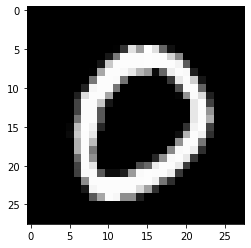

In [11]:
plt.imshow(image[:,:, 0], 'gray') #그리고 넘파이로 변환된 이미지를 출력
plt.show()

## 2. Set Data Generator : 
이제 본격적으로 데이터 generator하는 방법을 해보자. 
이 data generator을 사용하여 이미지에 변화를 주면서 컴퓨터의 학습자료(데이터)로 이용하여 더욱 효과적으로 학습 할 수 있게 한다. 

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
datagenerator = ImageDataGenerator(
    rotation_range = 20, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    horizontal_flip = True
)

In [15]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [17]:
image_result = next(iter(datagenerator.flow(inputs)))
image_result.shape

(1, 28, 28, 1)

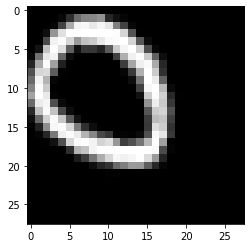

In [21]:
plt.imshow(np.squeeze(image_result), 'gray')
plt.show()

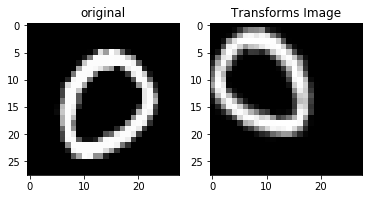

In [24]:
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(1, 2, 2)
plt.title('Transforms Image')
plt.imshow(np.squeeze(image_result), 'gray')
plt.show()

## 3. 가장 많이 사용되는 Transformation들